# Problem Statement:**Fraud Transation Detection**

## Q2. Describe your fraud detection model in elaboration.

Fraud detection models are designed to identify and flag potentially fraudulent activities or transactions within a system. These models play a crucial role in various industries, such as finance, e-commerce, healthcare, and telecommunications, where detecting fraud can prevent financial loss, protect sensitive data, and maintain the integrity of operations.

Here's an overview of a fraud detection model:

**1. Data Collection and Preprocessing:**
The first step involves collecting relevant data that could potentially indicate fraudulent behavior. This data can include transaction records, user profiles, device information, timestamps, location data, and more. The collected data is then preprocessed to handle missing values, outliers, and inconsistencies. Feature engineering techniques may also be applied to create new meaningful features that capture patterns related to fraud.

**2. Feature Selection and Extraction:**
In this stage, relevant features are selected from the preprocessed data. This could involve techniques like correlation analysis, feature importance from tree-based models, or domain knowledge. Additionally, feature extraction methods like Principal Component Analysis (PCA) or t-SNE (t-distributed Stochastic Neighbor Embedding) might be used to reduce dimensionality and retain important information.

**3. Model Selection:**
Fraud detection models can use a variety of machine learning algorithms. Some common choices include:
- Logistic Regression
- Decision Trees
- Random Forest
- Gradient Boosting
- Support Vector Machines (SVM)
- Neural Networks

The choice of algorithm depends on factors such as the nature of the data, the volume of transactions, and the desired trade-off between model complexity and interpretability.

**4. Model Training and Validation:**
The selected algorithm is trained on a labeled dataset where fraudulent and non-fraudulent transactions are appropriately labeled. The dataset is usually split into training, validation, and testing sets. During training, the model learns to recognize patterns associated with fraud. Hyperparameter tuning and cross-validation techniques help optimize the model's performance.

**5. Imbalanced Data Handling:**
Fraud detection datasets often suffer from class imbalance, where the number of non-fraudulent transactions far outweighs fraudulent ones. Techniques such as oversampling, undersampling, or using algorithms like SMOTE (Synthetic Minority Over-sampling Technique) can be employed to balance the dataset and prevent the model from being biased towards the majority class.

**6. Model Evaluation:**
Model evaluation involves assessing the model's performance on a separate testing dataset. Common evaluation metrics for fraud detection models include:
- Accuracy
- Precision, Recall, and F1-score
- Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
- Average Precision
- Confusion Matrix

**7. Post-processing and Thresholding:**
After obtaining model predictions, a decision threshold is applied to classify transactions as either fraudulent or legitimate. Depending on the specific use case and business requirements, the threshold may be adjusted to achieve the desired balance between false positives and false negatives.

**8. Real-time Monitoring and Feedback:**
Fraud detection is an ongoing process. Models are often deployed in real-time environments where they continuously monitor incoming transactions. As new data becomes available, the model can adapt and update its predictions. Feedback loops and human-in-the-loop systems can help improve model performance over time.

**9. Model Interpretability and Explainability:**
Interpretable models are preferred in fraud detection scenarios as they provide insights into the factors contributing to a prediction. Techniques like feature importance analysis, SHAP (SHapley Additive exPlanations), and LIME (Local Interpretable Model-Agnostic Explanations) can help explain the model's decisions to stakeholders.


## Q3. How did you select variables to be included in the model?

The process of selecting variables (features) to be included in a model is a crucial step in building an effective machine learning model. The goal is to choose the most relevant and informative features that contribute to the model's predictive power and generalization ability. Here's a general outline of how variables are typically selected for inclusion in a model:

1. **Domain Knowledge:** Domain experts have a deep understanding of the problem you're trying to solve. They can provide valuable insights into which variables are likely to be important based on their expertise. Collaborating with domain experts helps ensure that the selected variables align with the underlying dynamics of the problem.

2. **Exploratory Data Analysis (EDA):** Before building a model, it's essential to perform exploratory data analysis. This involves visualizing and analyzing the distribution, relationships, and patterns in your data. EDA can help you identify potential variables that show distinct patterns or correlations with the target variable.

3. **Feature Importance Techniques:** Some machine learning algorithms provide feature importance scores as a byproduct of training. For example, decision tree-based algorithms (e.g., Random Forest, Gradient Boosting) offer feature importance rankings that show how much each variable contributes to the model's predictive performance. This information can guide you in selecting the most important features.

4. **Correlation Analysis:** Calculate correlation coefficients between your features and the target variable. Features with higher absolute correlations may be more relevant for the model. Be cautious of multicollinearity (high correlation between features) as it can affect the model's stability and interpretability.

5. **Feature Selection Algorithms:** There are various feature selection algorithms designed to automatically identify the most relevant features. Some common techniques include:
   - Recursive Feature Elimination (RFE): Iteratively removes the least important features based on model performance.
   - LASSO (Least Absolute Shrinkage and Selection Operator): Applies L1 regularization to shrink coefficients of less important features toward zero.
   - SelectKBest: Selects the top k features based on statistical tests.

6. **Dimensionality Reduction:** Techniques like Principal Component Analysis (PCA) and t-SNE can help reduce dimensionality while retaining most of the variability in the data. These methods are particularly useful when dealing with high-dimensional data.

7. **Feature Engineering:** Create new features derived from existing ones that capture important information or relationships. Feature engineering can involve transformations, aggregations, interactions, and more. For example, in a time-series context, you might create features like moving averages or lagged variables.

8. **Regularization:** When using algorithms like Ridge Regression or LASSO, the regularization process itself helps select features. Regularization techniques penalize the magnitudes of feature coefficients, leading to automatic feature selection as some coefficients are driven toward zero.

9. **Business Relevance and Practicality:** Consider including variables that have practical implications and align with the business problem you're solving. Including variables that make intuitive sense to stakeholders can enhance the model's credibility and adoption.

10. **Iterative Process:** Variable selection is often an iterative process. You might start with a set of features, build a model, analyze its performance, and then refine the feature set based on insights gained.


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading Datasets

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Internship/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Datasets Information:

* **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* **amount** - amount of the transaction in local currency.

* **nameOrig** - customer who started the transaction

* **oldbalanceOrg** - initial balance before the transaction

* **newbalanceOrig** - new balance after the transaction

* **nameDest** - customer who is the recipient of the transaction

* **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* **isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.* **

# Data Exploration

In [ ]:
df.shape

(6362620, 11)

* There is `6362620 obervation` and `11 features` n given datasets

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


* Correcting the name `newbalanceOrig`

In [ ]:
df.rename(columns={'newbalanceOrig':'newbalanceOrg'},inplace=True)
df.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


## Q1. Data cleaning including missing values, outliers and multi-collinearity.

## Checking null value

In [ ]:
df.isnull()

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrg     0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
print('Data does not have any NULL value.')
df.isnull().any()

Data does not have any NULL value.


step              False
type              False
amount            False
oldbalanceOrg     False
newbalanceOrg     False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

* **No null value present in given datasest**

* **The provided data has the financial transaction data as well as the target variable isFraud, which is the actual fraud status of the transaction and isFlaggedFraud is the indicator which the simulation is used to flag the transaction using some threshold value.**

In [ ]:
print('Minimum value of Amount, Old/New Balance of Origin/Destination:')
df[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].min()

Minimum value of Amount, Old/New Balance of Origin/Destination:


amount            0.0
oldbalanceOrg     0.0
newbalanceOrg     0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [ ]:
print('Minimum value of Amount, Old/New Balance of Origin/Destination:')
df[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].max()

Minimum value of Amount, Old/New Balance of Origin/Destination:


amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrg     4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

# Data Analysis

* **Since there is no missing and garbage value, there is no need for data cleaning, but we still need to perform data analysis as data contaion huge variation of the value in different columns. Normalization will also imporve the overall accuracy of the machine learning model.**

In [ ]:
plt.style.use('dark_background')

### Let's check which type of transaction is more

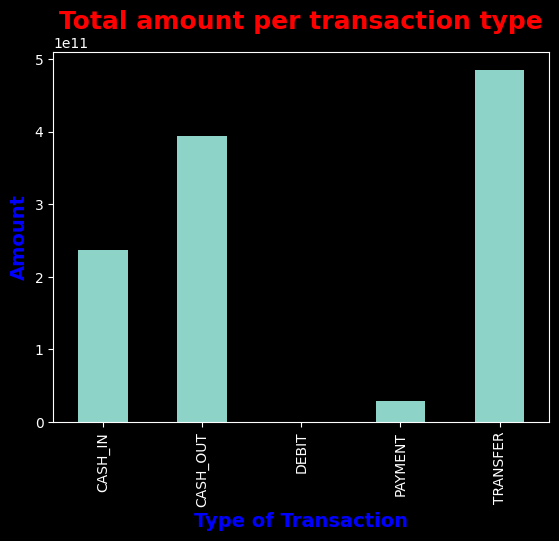

In [ ]:
var = df.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type",weight='bold', size=18,color='red')
ax1.set_xlabel('Type of Transaction',weight='bold', size=14,color='blue')
ax1.set_ylabel('Amount',weight='bold', size=14,color='blue');

In [ ]:
df.loc[df.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

The graph above shows that **TRANSFER** and **CASH_OUT** are two most used mode of transaction and we can see that **TRANSFER** and **CASH_OUT** are also the only way in which fraud happen. **Thus we will focus on this type of transactions**.

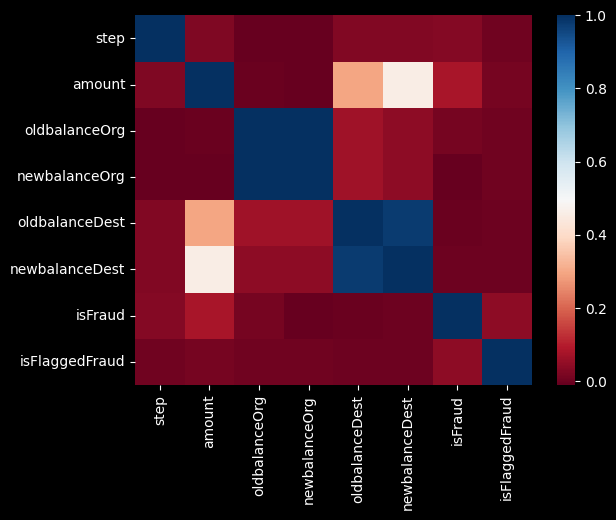

In [ ]:
import seaborn as sns
df = df.drop('type', axis=1)
sns.heatmap(df.corr(),cmap='RdBu');

**Things we can conclude from this heatmap:**

* OldbalanceOrg and NewbalanceOrg are highly correlated.
* OldbalanceDest and NewbalanceDest are highly correlated.
* Amount is correlated with isFraud(Target Variable).

There is not much relation between the features, so we need to understand where the relationship between them depends on the type of transaction and amount. To do so, **we need to see the heat map of fraud and nonfraud transactions differently**.

In [ ]:
fraud = df.loc[df.isFraud == 1]
nonfraud = df.loc[df.isFraud == 0]

In [ ]:
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

There are 2 flags which stand out to me and it's interesting to look onto: isFraud and isFlaggedFraud column. From the hypothesis, **isFraud** is the indicator which indicates the **actual fraud transactions** whereas **isFlaggedFraud** is what the system prevents the transaction due to **some thresholds** being triggered. From the above heatmap we can see that there is some relation between other columns and isFlaggedFraud thus there must be relation between isFraud.

In [ ]:
print('The total number of fraud transaction is {}.'.format(df.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud: {}.'.format(df.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 8213.
The total number of fraud transaction which is marked as fraud: 16.
Ratio of fraud transaction vs non-fraud transaction is 1:773.


In [ ]:
print('Thus in every 773 transaction there is 1 fraud transaction happening.')
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))

Thus in every 773 transaction there is 1 fraud transaction happening.
Amount lost due to these fraud transaction is $12056415427.


In [ ]:
piedata = fraud.groupby(['isFlaggedFraud']).sum()

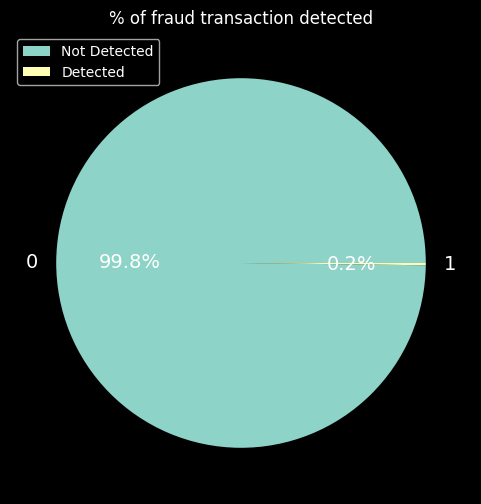

In [ ]:
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

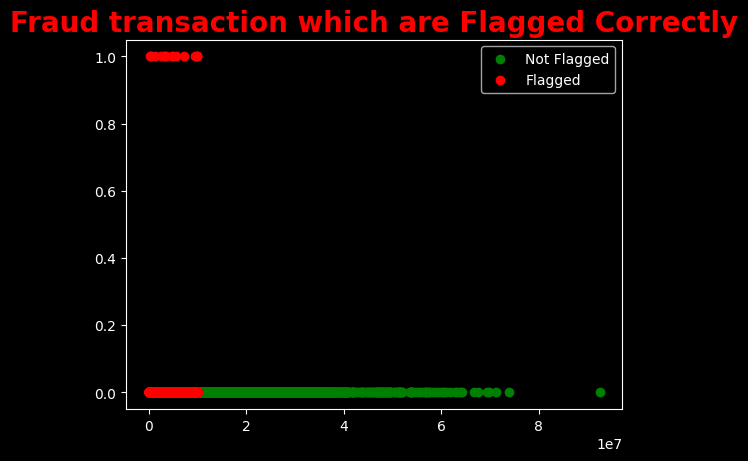

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly",fontsize=20,fontweight='bold',color='red')
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

The plot above clearly shows the **need** for a system which can be **fast** and **reliable** to mark the transaction which is fraud. Since, the current system is letting fraud transaction able to **pass through a system** which is **not labeling them as a fraud**. Some data exploration can be helpful to check for the relation between features.

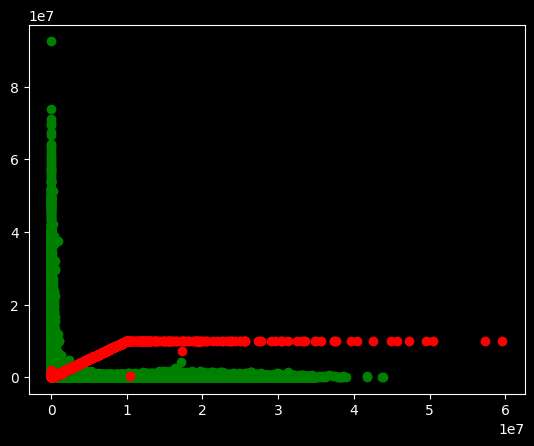

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
plt.show()

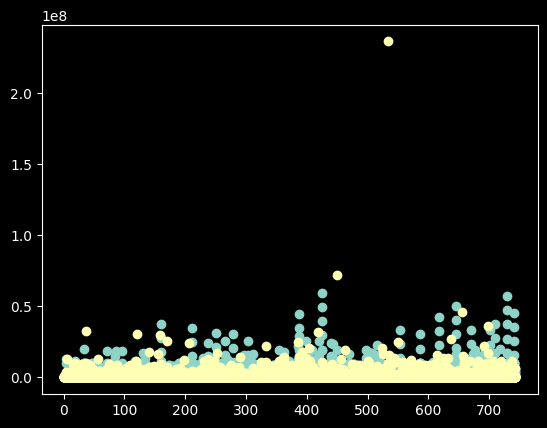

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

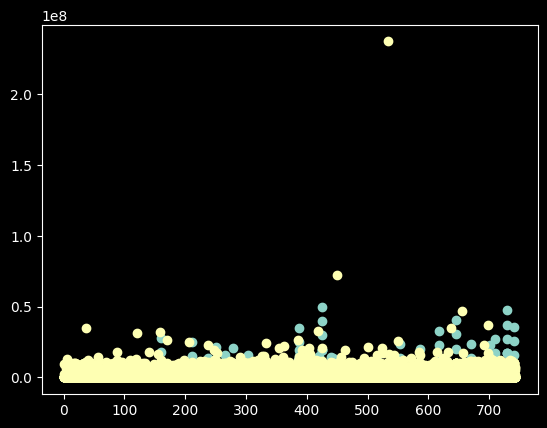

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceDest'])
plt.show()

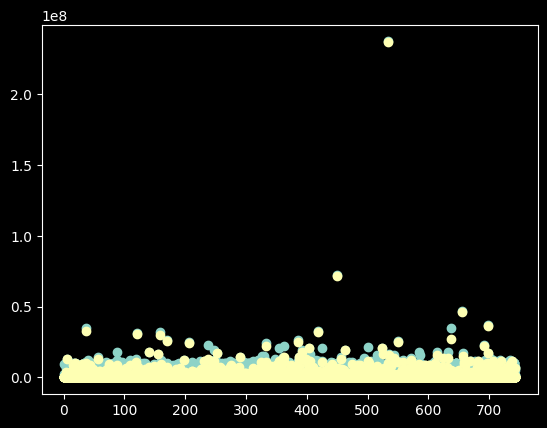

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceDest'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

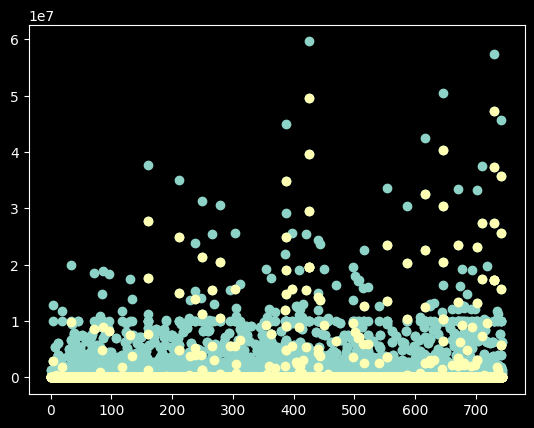

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
plt.show()

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data = data.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                                            'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [4]:
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [5]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


### Dependent and Independent features

In [6]:
X = data.drop(['isFraud'],axis=1)
y = data[['isFraud']]

# Model Training

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, average_precision_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store results
results = {}

# Initialize and train classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier()
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)

    results[name] = {"Accuracy": accuracy, "Avg Precision": avg_precision}

# Print results
for name, scores in results.items():
    print(f"{name}:\nAccuracy: {scores['Accuracy']:.4f}\nAvg Precision: {scores['Avg Precision']:.4f}\n")


# 1. Logistic Regression

In [8]:
from sklearn.model_selection import train_test_split
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, average_precision_score

clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
avg_precision_lr = average_precision_score(y_test, y_pred_lr)

print("Accuracy: ",accuracy_lr)
print("Average Precision Score: ",avg_precision_lr)

Accuracy:  0.9983128019589415
Average Precision Score:  0.149732445690888


# 2. Decision Trees

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
avg_precision_dt = average_precision_score(y_test, y_pred_dt)

print("Accuracy: ",accuracy_dt)
print("Average Precision Score: ",avg_precision_dt)

Accuracy:  0.9997147401542132
Average Precision Score:  0.7871318251870664


#  3. Support Vector Machines (SVMs)

In [9]:
from sklearn.svm import SVC

clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
avg_precision_svm = average_precision_score(y_test, y_pred_svm)

print("Accuracy: ",accuracy_svm)
print("Average Precision Score: ",avg_precision_svm)

#  4. K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
avg_precision_knn = average_precision_score(y_test, y_pred_knn)

print("Accuracy: ",accuracAccuracy:  0.9997147401542132y_knn)
print("Average Precision Score: ",avg_precision_knn)

#  5. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
avg_precision_nb = average_precision_score(y_test, y_pred_nb)

print("Accuracy: ",accuracy_nb)
print("Average Precision Score: ",avg_precision_nb)

# 6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
avg_precision_rf = average_precision_score(y_test, y_pred_rf)

print("Accuracy: ",accuracy_rf)
print("Average Precision Score: ",avg_precision_rf)

# 7.  Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)
y_pred_gb = clf_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
avg_precision_gb = average_precision_score(y_test, y_pred_gb)

print("Accuracy: ",accuracy_gb)
print("Average Precision Score: ",avg_precision_gb)

# 8. AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf_ab = AdaBoostClassifier()
clf_ab.fit(X_train, y_train)
y_pred_ab = clf_ab.predict(X_test)

accuracy_ab = accuracy_score(y_test, y_pred_ab)
avg_precision_ab = average_precision_score(y_test, y_pred_ab)

print("Accuracy: ",accuracy_ab)
print("Average Precision Score: ",avg_precision_ab)

# 9. XGBoost

In [10]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
avg_precision_xgb = average_precision_score(y_test, y_pred_xgb)

print("Accuracy: ",accuracy_xgb)
print("Average Precision Score: ",avg_precision_xgb)

# Conclusion
* **Decision Tree got highest Accuracy:  0.9997147401542132**
* **Existing rule-based system is not capable of detection of all the fraud transaction.**
* **Machine learning can be used for the detection of fraud transaction.**
* **Predictive models produce good precision score and are capable of detection of fraud transaction.**

## Q5. What are the key factors that predict fraudulent customer?

Predicting fraudulent customers involves identifying patterns and behaviors that are indicative of fraudulent activity. While the specific factors can vary depending on the industry and context, here are some key factors that commonly contribute to predicting fraudulent customers:

1. **Unusual Transaction Patterns:**
   - Unusually large transactions: Fraudsters might make large transactions to maximize their gains before detection.
   - Unusual frequency: Fraudsters may perform a high number of transactions in a short period to exploit vulnerabilities.

2. **Geographic Anomalies:**
   - Transactions from multiple geographically distant locations in a short time: This could indicate stolen credentials being used by different individuals.

3. **Behavioral Anomalies:**
   - Sudden changes in spending behavior: Fraudsters might change spending habits to imitate legitimate customers.
   - Frequent transactions at odd hours: Transactions occurring at unusual times can be a red flag.

4. **Unusual Payment Methods:**
   - Frequent use of prepaid cards or one-time-use virtual cards: These methods can be harder to trace and may indicate fraudulent activity.

5. **Device and IP Address Anomalies:**
   - Frequent changes in devices or IP addresses: Fraudsters might use different devices and locations to evade detection.

6. **Account Creation and Login Patterns:**
   - Frequent account creations with similar details: Fraudsters may create multiple accounts to exploit promotions or bypass restrictions.
   - Numerous failed login attempts: This could indicate unauthorized access attempts.

7. **Suspicious Product or Service Requests:**
   - Ordering high-value items and requesting expedited shipping: Fraudsters may try to quickly obtain valuable goods before their activity is detected.

8. **Social Engineering Indicators:**
   - Overly aggressive or threatening behavior in customer interactions: This could be an attempt to pressure customer service representatives into taking unauthorized actions.

9. **Account Takeover Indicators:**
   - Sudden changes to account information (email, phone number, etc.): Fraudsters may try to take control of accounts.

10. **Unusual Login Locations:**
    - Logins from locations that have never been associated with the account before: Indicates potential unauthorized access.

11. **High-Risk Transaction Patterns:**
    - Rapid, large, or frequent transfers between accounts: Fraudsters may attempt to move money quickly before being caught.

12. **Past Fraudulent History:**
    - Historical data of past fraudulent behavior associated with a particular customer: This could be a strong indicator of potential future fraudulent activity.

13. **Machine Learning and Anomaly Detection:**
    - Utilizing advanced machine learning techniques, such as anomaly detection algorithms, to identify unusual patterns or deviations from normal behavior.



## Q6. Do these factors make sense? If yes, How? If not, How not?

Yes, the factors mentioned in the previous response do make sense for predicting fraudulent customer behavior. These factors are based on common patterns and behaviors that are often associated with fraudulent activities. 
While these factors make sense for detecting fraud, it's important to apply these considerations within the context of your specific industry and use case. Fraud detection is a dynamic field, and it's essential to continuously adapt and refine these factors based on evolving fraud patterns and emerging threats. Collaborating with domain experts and leveraging data-driven insights are key to building effective fraud detection systems.

## Q7. What kind of prevention should be adopted while company update its infrastructure?

When a company is updating its infrastructure, especially in the context of technology and IT systems, it's essential to adopt preventive measures to ensure a smooth and secure transition. Here are some key prevention strategies that should be considered during an infrastructure update:

1. **Risk Assessment and Planning:**
   - Conduct a thorough risk assessment to identify potential vulnerabilities and risks associated with the infrastructure update.
   - Develop a comprehensive plan that outlines the scope of the update, potential risks, mitigation strategies, and a timeline for implementation.

2. **Data Backup and Disaster Recovery:**
   - Perform regular data backups before the update to ensure that critical data is protected and can be restored in case of any issues during the update.
   - Establish a robust disaster recovery plan to quickly restore operations in case of unexpected failures or data loss.

3. **Security Audits and Vulnerability Assessments:**
   - Conduct security audits and vulnerability assessments to identify and address potential security weaknesses in the updated infrastructure.
   - Implement security patches and updates for software and systems to mitigate known vulnerabilities.

4. **Access Control and User Permissions:**
   - Review and update user access controls and permissions to ensure that only authorized personnel have access to sensitive systems and data.
   - Implement the principle of least privilege, granting users only the minimum access necessary for their roles.

5. **Network Segmentation:**
   - Implement network segmentation to isolate different parts of the infrastructure, preventing lateral movement by attackers in case of a breach.

6. **Security Training and Awareness:**
   - Provide training to employees on updated security protocols, best practices, and potential risks associated with the new infrastructure.
   - Raise awareness about social engineering attacks, such as phishing, to prevent unauthorized access.

7. **Testing and Quality Assurance:**
   - Conduct thorough testing and quality assurance of the updated infrastructure before deployment to identify and rectify any issues or bugs.

8. **Incident Response Plan:**
   - Develop an incident response plan that outlines steps to be taken in case of a security breach or unexpected issues during the update.
   - Assign responsibilities and establish communication channels for reporting and responding to incidents.

9. **Encryption and Data Protection:**
   - Implement encryption mechanisms to protect sensitive data at rest and during transmission.
   - Utilize encryption protocols such as SSL/TLS for secure communication.

10. **Monitoring and Logging:**
    - Set up robust monitoring and logging systems to track and analyze activities within the updated infrastructure.
    - Monitor for suspicious or unusual behavior that could indicate a security breach.

11. **Third-Party Vendor Security:**
    - If the update involves third-party vendors, ensure that they adhere to security best practices and meet your company's security standards.

12. **Regulatory Compliance:**
    - Ensure that the updated infrastructure complies with relevant industry regulations and data protection laws.

13. **Communication and Transparency:**
    - Maintain clear and transparent communication with stakeholders, employees, and customers about the infrastructure update, its purpose, and any potential impacts.

14. **Contingency Plans:**
    - Develop contingency plans for potential disruptions or failures during the update process to minimize business impact.

By adopting these prevention strategies, a company can minimize risks, enhance security, and ensure a successful and secure transition when updating its infrastructure.


## Q8. Assuming these actions have been implemented, how would you determine if they work?

To determine if the preventive actions implemented during an infrastructure update are effective, a comprehensive assessment and evaluation process should be carried out. Here's how you can determine the effectiveness of the actions:

1. **Performance Metrics:**
   - Monitor key performance metrics related to the updated infrastructure, such as response times, system uptime, and network latency. Any improvements or stabilization in these metrics could indicate positive results.

2. **Security Incident Trends:**
   - Compare historical security incident trends before and after the update. A reduction in the number and severity of security incidents, breaches, or unauthorized access attempts would suggest improved security.

3. **Vulnerability Scans and Penetration Testing:**
   - Regularly conduct vulnerability scans and penetration testing to identify potential weaknesses. If the number and severity of vulnerabilities decrease over time, it indicates that security measures are effective.

4. **User Behavior Analysis:**
   - Monitor user behavior and access patterns to identify any unusual or suspicious activities. A decrease in unusual behavior can indicate that preventive actions are deterring unauthorized access.

5. **Incident Response Testing:**
   - Simulate security incidents through tabletop exercises or red teaming to evaluate how well the incident response plan and processes work.

6. **Employee Training Assessment:**
   - Evaluate the effectiveness of security training and awareness programs by measuring employee understanding of security protocols and their ability to identify and respond to security threats.

7. **System Reliability and Availability:**
   - Analyze system reliability and availability post-update. If there's a decrease in system outages or downtime, it suggests that the update and preventive measures have positively impacted system stability.

8. **User Feedback and Satisfaction:**
   - Gather feedback from users, stakeholders, and customers to gauge their perception of the updated infrastructure's performance, security, and usability.

9. **Compliance Audits:**
   - Conduct compliance audits to ensure that the updated infrastructure meets regulatory requirements and industry standards. Passing audits demonstrates effective implementation of security measures.

10. **Reduction in Unauthorized Access:**
    - Measure the reduction in unauthorized access attempts, account breaches, and fraudulent activities. Fewer incidents of unauthorized access suggest that preventive actions are working.

11. **Data Loss Prevention:**
    - Assess the effectiveness of data loss prevention mechanisms by monitoring and tracking incidents of sensitive data leakage. A reduction in data breaches indicates improved data protection.

12. **Continual Monitoring and Improvement:**
    - Implement continuous monitoring and regular review processes to track the ongoing effectiveness of preventive measures. Regularly update and adapt security protocols based on emerging threats and evolving business needs.

13. **Comparison to Industry Benchmarks:**
    - Compare the performance and security metrics of your updated infrastructure to industry benchmarks and best practices to gauge your organization's standing within the broader landscape.


# Thank You!